In [654]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [655]:
# 1. DecisionTreeClassifier
# 2. Bagging
# 3. Boosting
# 4. Stacking

In [656]:
header_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8','A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv(r'C:\Users\user\Documents\Edu\hw8_credit_approval/crx.data', sep=',', names=header_names)

In [657]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [659]:
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [660]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [661]:
mask = df.eq('?').any(axis=1)
df = df.drop(df[mask].index)

In [662]:
df["A2"] = df["A2"].astype(float)

In [663]:
x_df = df.drop(['A16'], axis=1)
y_df = pd.DataFrame(df['A16'], columns=['A16'])

In [664]:
cat_cols = x_df.select_dtypes(include='object').columns
num_cols = x_df.select_dtypes(include='number').columns

In [665]:
num_df = x_df[num_cols]
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      653 non-null    float64
 1   A3      653 non-null    float64
 2   A8      653 non-null    float64
 3   A11     653 non-null    int64  
 4   A15     653 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 30.6 KB


In [666]:
cat_df = df[cat_cols]

In [667]:
cat_df.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14
0,b,u,g,w,v,t,t,f,g,00202
1,a,u,g,q,h,t,t,f,g,00043
2,a,u,g,q,h,t,f,f,g,00280
3,b,u,g,w,v,t,t,t,g,00100
4,b,u,g,w,v,t,f,f,s,00120


In [668]:
uniques = {col: cat_df[col].unique() for col in cat_df.columns}

In [669]:
print(uniques)

{'A1': array(['b', 'a'], dtype=object), 'A4': array(['u', 'y', 'l'], dtype=object), 'A5': array(['g', 'p', 'gg'], dtype=object), 'A6': array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j'], dtype=object), 'A7': array(['v', 'h', 'bb', 'ff', 'j', 'z', 'o', 'dd', 'n'], dtype=object), 'A9': array(['t', 'f'], dtype=object), 'A10': array(['t', 'f'], dtype=object), 'A12': array(['f', 't'], dtype=object), 'A13': array(['g', 's', 'p'], dtype=object), 'A14': array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', '00980', '00443', '00140', '00094',
       '00368', '00288', '00188', '00112', '00171', '00268', '00167',
       '00075', '00152',

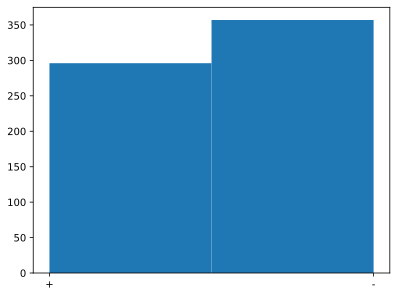

In [670]:
import matplotlib.pyplot as plt
plt.hist(y_df, bins=2);

In [671]:
y_df['A16'] = y_df['A16'].replace({'-': 0, '+': 1})

In [672]:
y_df.head()

,A16
0,1
1,1
2,1
3,1
4,1


In [673]:
print('Categories encoding')
import category_encoders as ce
oe = ce.OrdinalEncoder(cols=cat_df.columns.tolist())
encoded_df = oe.fit_transform(cat_df)
encoded_df

Categories encoding


,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14
0,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,2,1,1,1,1,2
2,2,1,1,2,2,1,2,1,1,3
3,1,1,1,1,1,1,1,2,1,4
4,1,1,1,1,1,1,2,1,2,5
...,...,...,...,...,...,...,...,...,...,...
685,1,2,2,11,2,2,2,1,1,12
686,2,1,1,7,1,2,1,2,1,17
687,2,2,2,13,4,2,1,2,1,17
688,1,1,1,12,1,2,2,1,1,3


In [674]:
num_df.head()

,A2,A3,A8,A11,A15
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0


In [675]:
x_df = pd.concat([num_df, encoded_df], axis=1)

In [676]:
x_df.head()

,A2,A3,A8,A11,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14
0,30.83,0.000,1.25,1,0,1,1,1,1,1,1,1,1,1,1
1,58.67,4.460,3.04,6,560,2,1,1,2,2,1,1,1,1,2
2,24.50,0.500,1.50,0,824,2,1,1,2,2,1,2,1,1,3
3,27.83,1.540,3.75,5,3,1,1,1,1,1,1,1,2,1,4
4,20.17,5.625,1.71,0,0,1,1,1,1,1,1,2,1,2,5


In [677]:
print("Numeric dataset features normalization")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for c in num_cols:
    x_df.loc[:, c] = scaler.fit_transform(x_df[[c]])

Numeric dataset features normalization


Correlation matrix (numeric features and metrics)


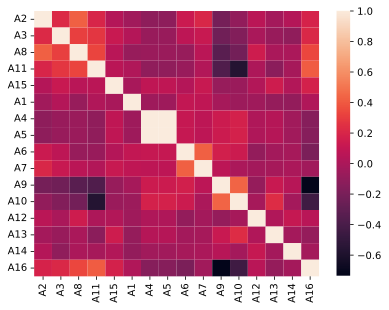

In [678]:
print('Correlation matrix (numeric features and metrics)')
df1 = pd.concat([x_df, y_df], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix);

In [679]:
#x_df.iloc[:, :8]

In [680]:
#x_df.iloc[:, -7:]

PairPlots


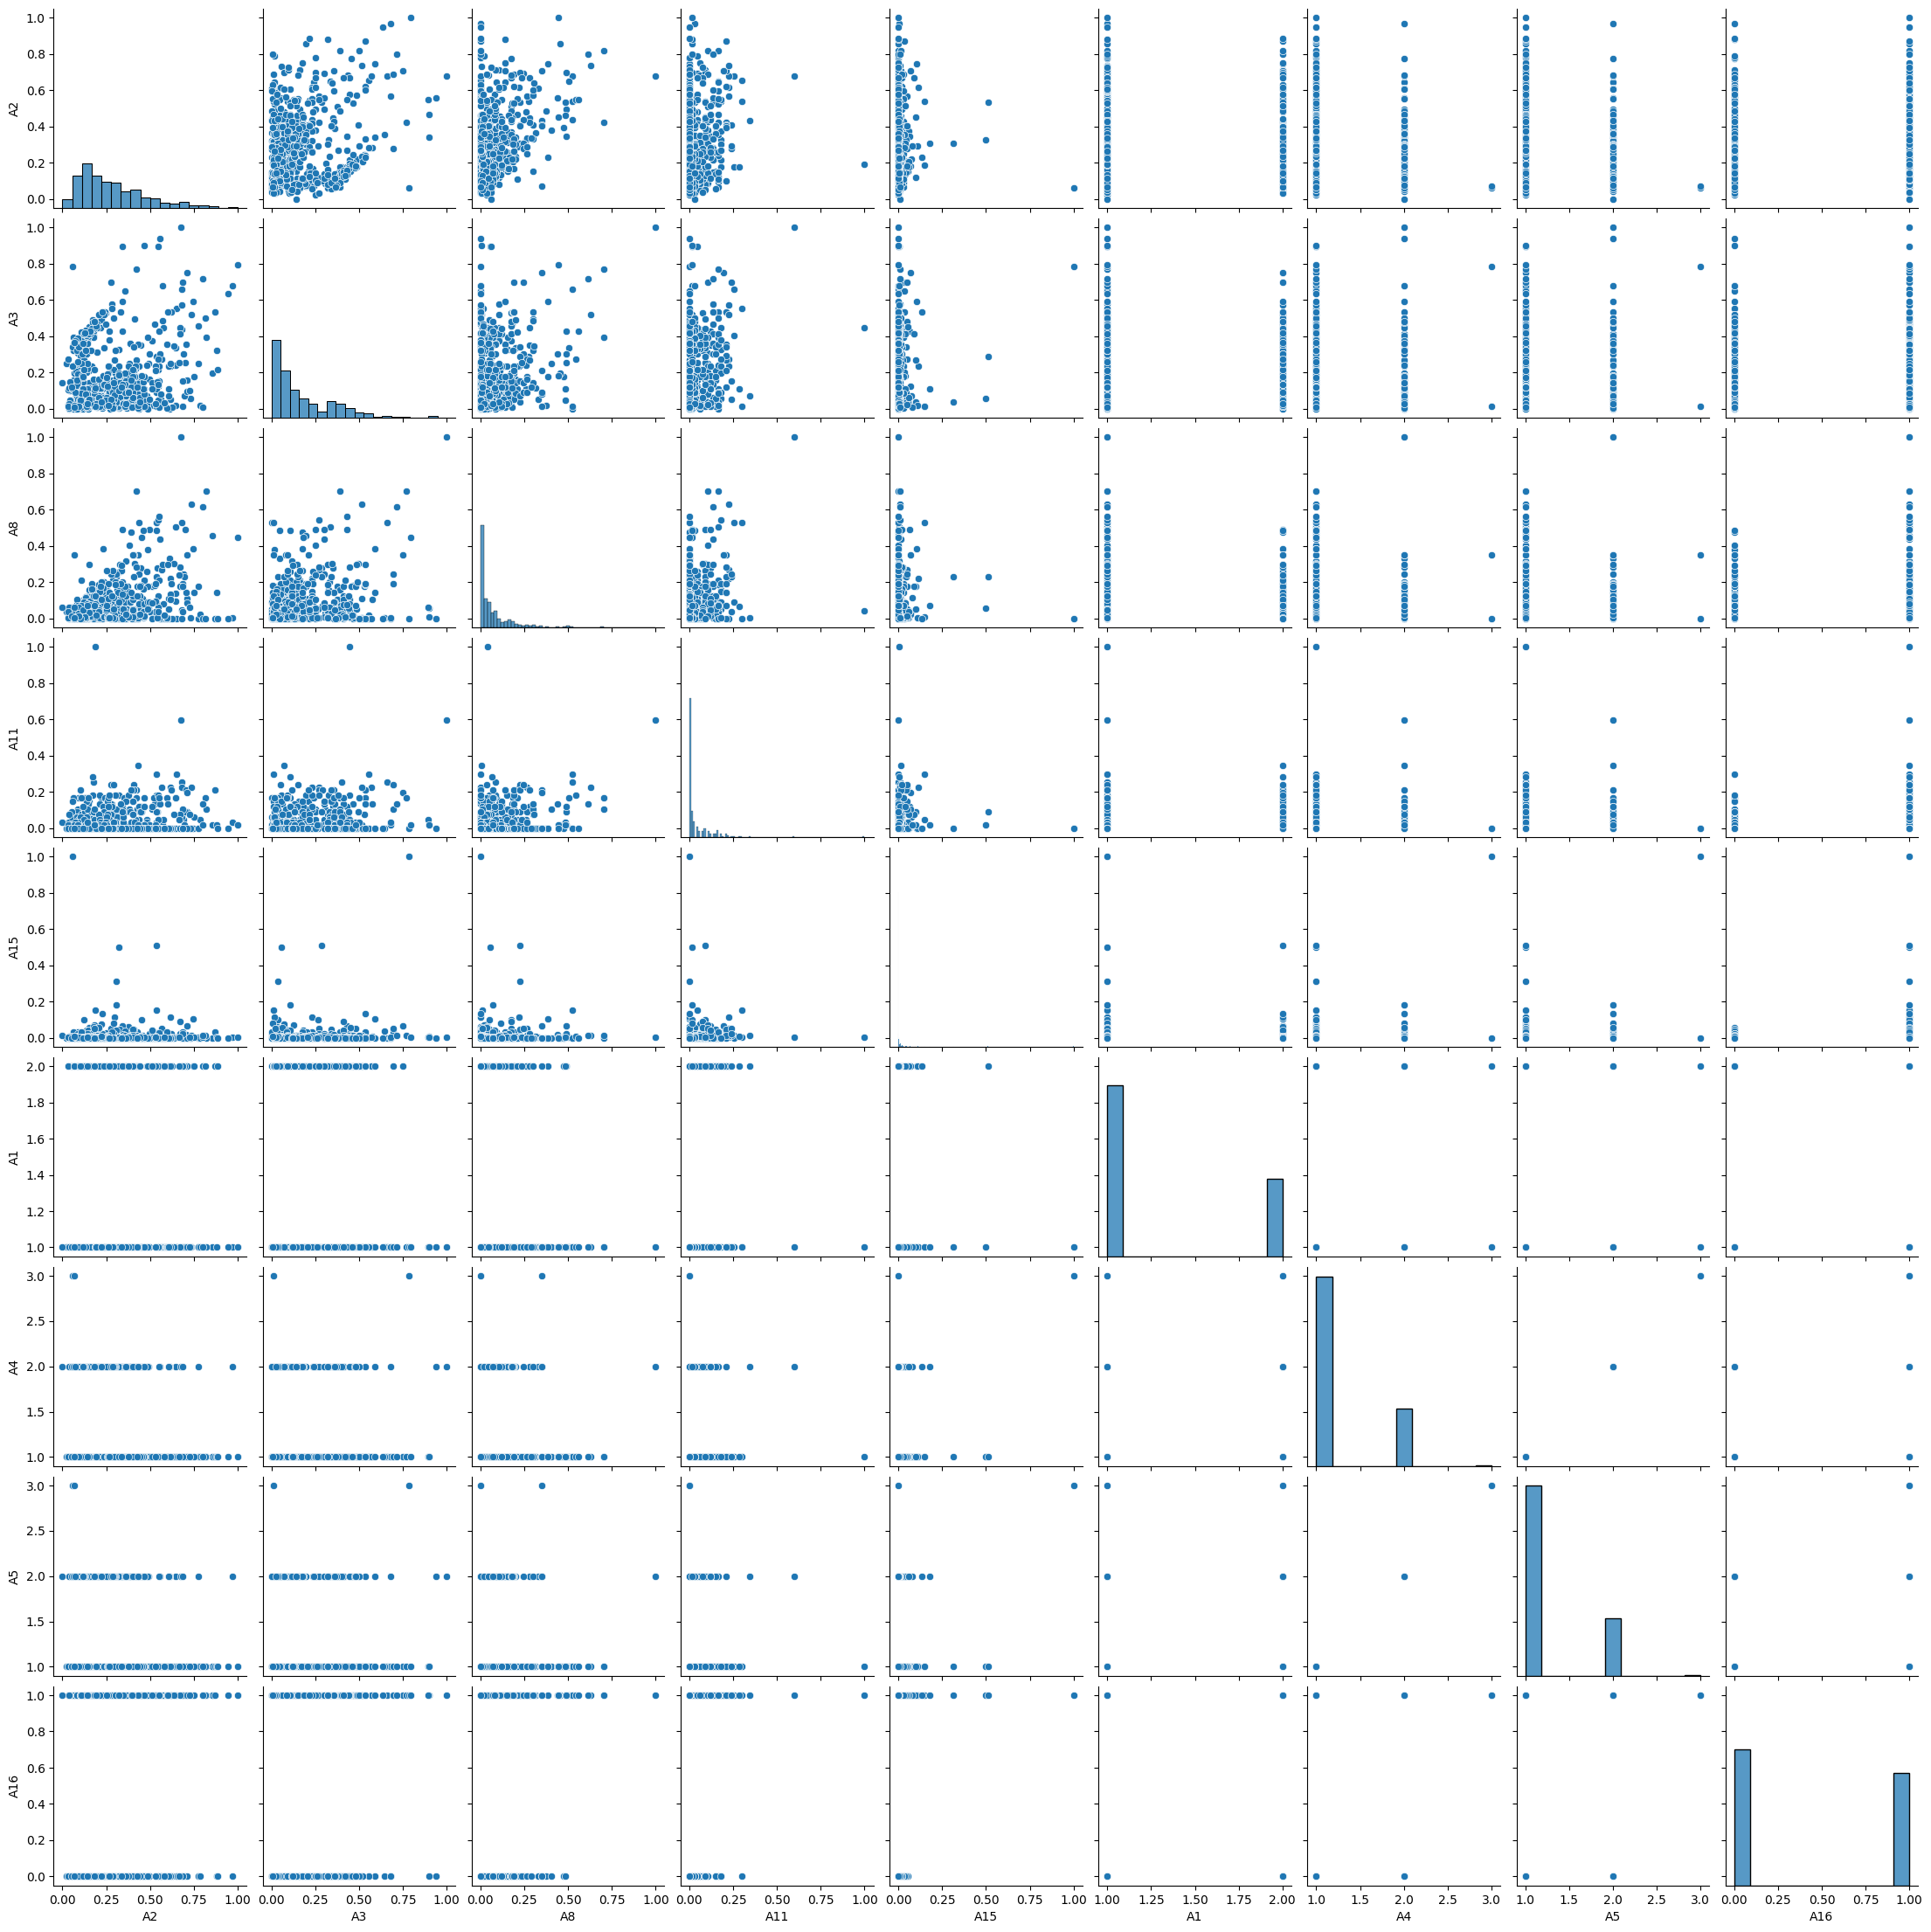

In [681]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df.iloc[:, :8], y_df], axis=1)
sns.pairplot(df1);

PairPlots


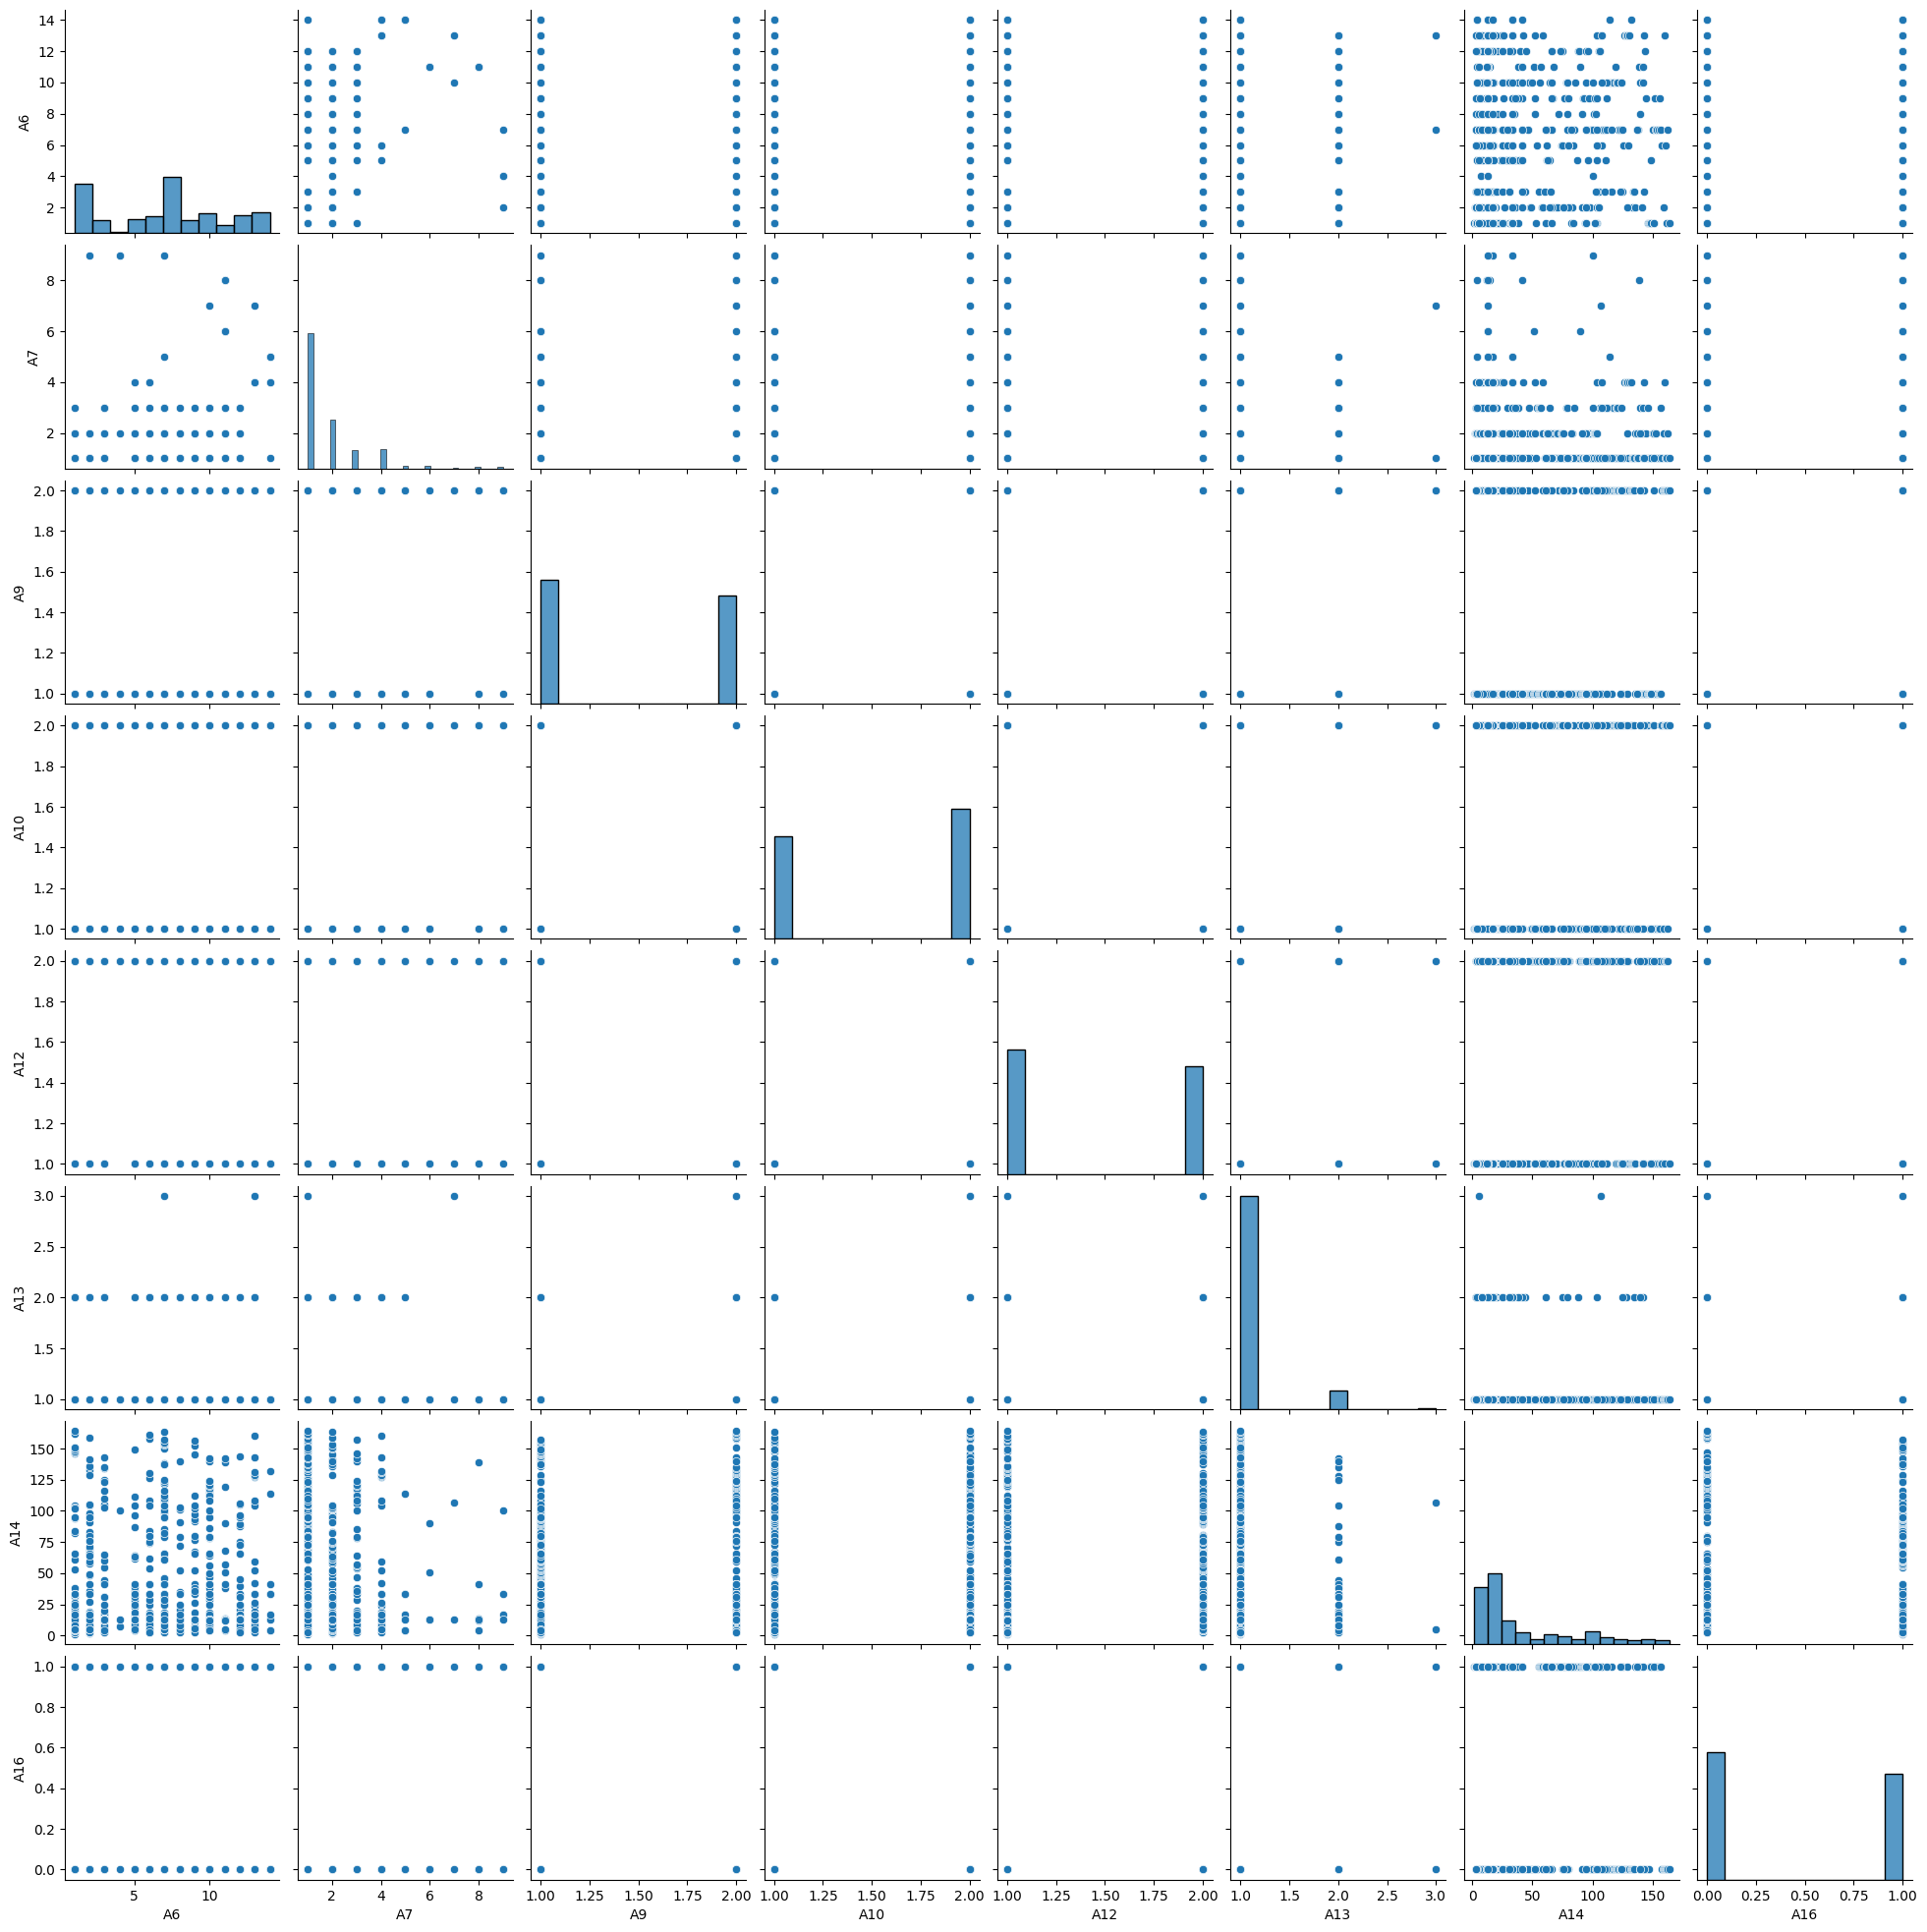

In [682]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df.iloc[:, -7:], y_df], axis=1)
sns.pairplot(df1);

In [683]:
x_df = x_df.drop(['A1', 'A4', 'A5', 'A9', 'A10', 'A12', 'A13', 'A15'], axis=1)

Correlation matrix (numeric features and metrics)


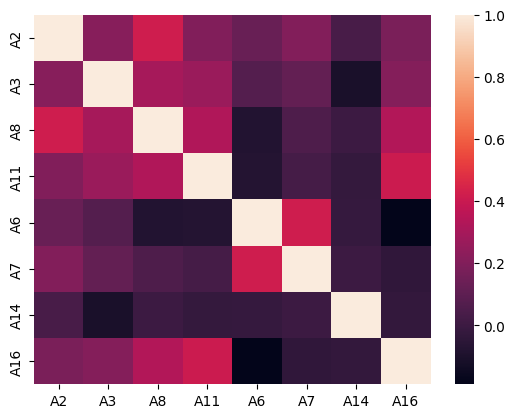

In [684]:
print('Correlation matrix (numeric features and metrics)')
df1 = pd.concat([x_df, y_df], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix);

PairPlots


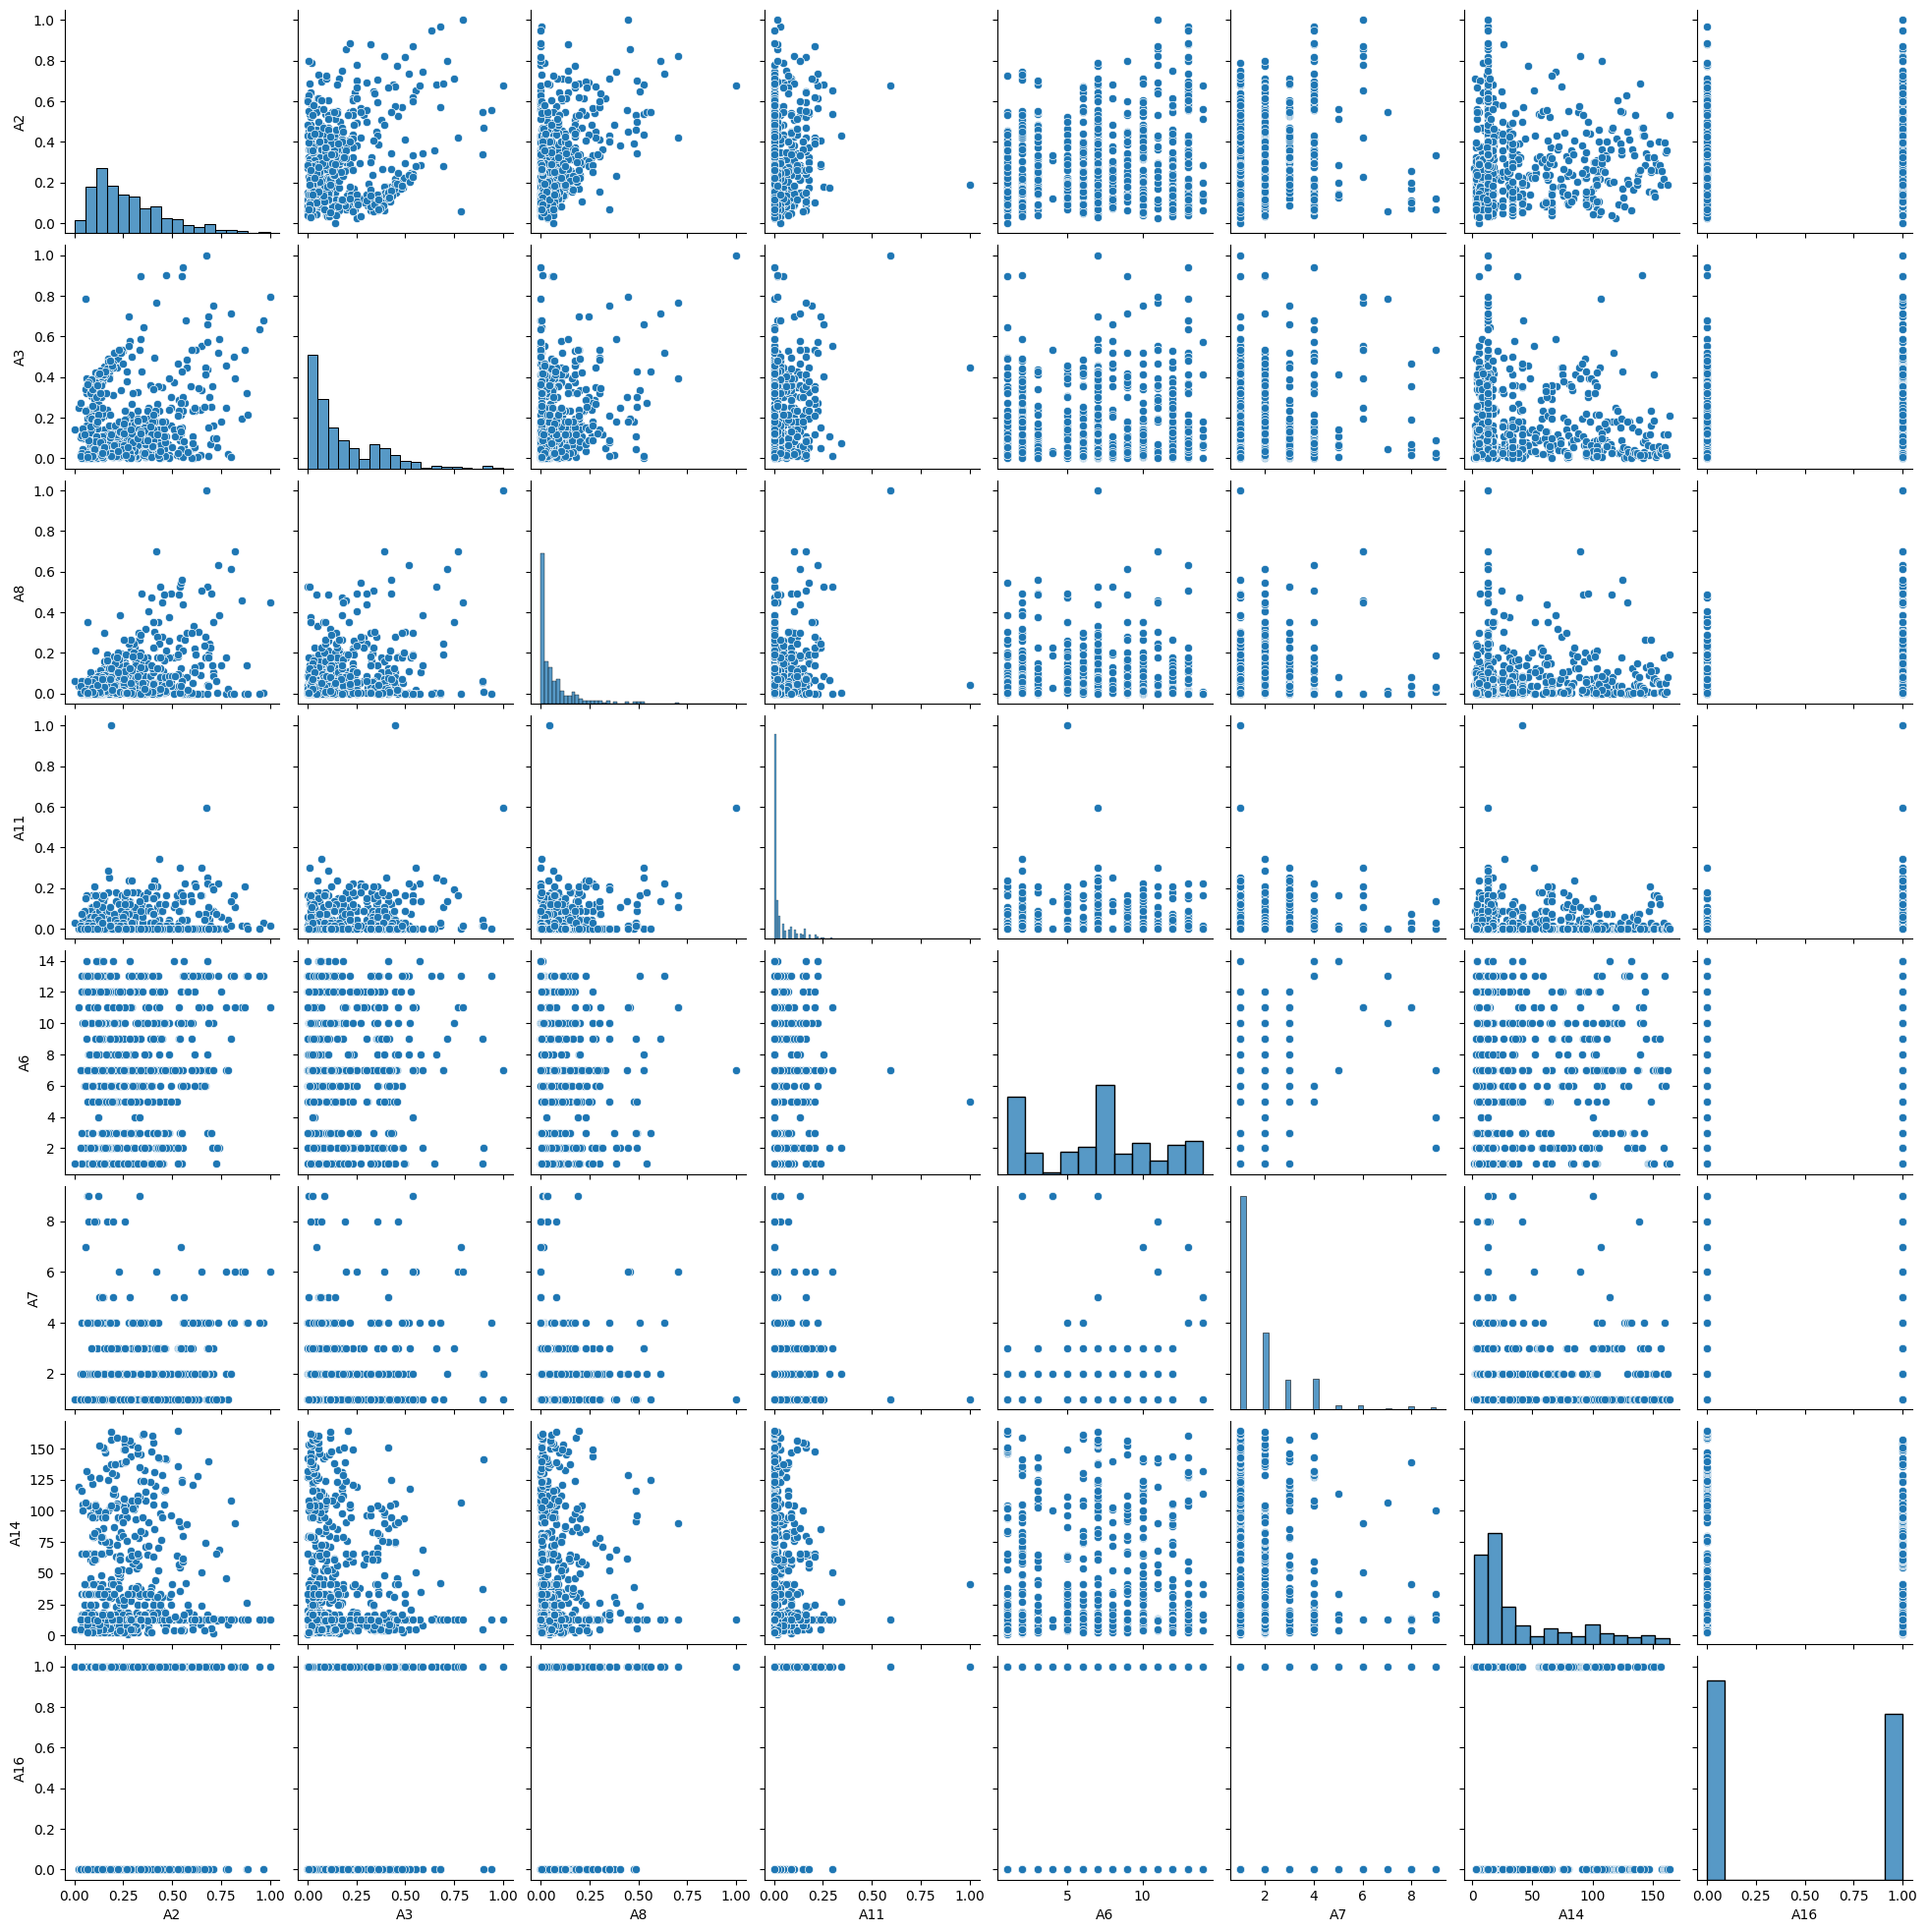

In [685]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df, y_df], axis=1)
sns.pairplot(df1);

In [686]:
#x_df['A2A3'] = x_df['A2'] / x_df['A3']
x_df['A3A8'] = x_df['A3'] / x_df['A8']
x_df['A2A14'] = x_df['A2'] / x_df['A14']

In [687]:
x_df.isna().sum()

A2       0
A3       0
A8       0
A11      0
A6       0
A7       0
A14      0
A3A8     4
A2A14    0
dtype: int64

In [688]:
x_df.head()

,A2,A3,A8,A11,A6,A7,A14,A3A8,A2A14
0,0.271111,0.000000,0.043860,0.014925,1,1,1,0.000000,0.271111
1,0.713016,0.159286,0.106667,0.089552,2,2,2,1.493304,0.356508
2,0.170635,0.017857,0.052632,0.000000,2,2,3,0.339286,0.056878
3,0.223492,0.055000,0.131579,0.074627,1,1,4,0.418000,0.055873
4,0.101905,0.200893,0.060000,0.000000,1,1,5,3.348214,0.020381


In [689]:
#y_df

In [690]:
mask = x_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
rows = x_df.loc[mask].index.values
#print(rows)

In [691]:
x_df = x_df.loc[~mask]

In [692]:
x_df.head()

,A2,A3,A8,A11,A6,A7,A14,A3A8,A2A14
0,0.271111,0.000000,0.043860,0.014925,1,1,1,0.000000,0.271111
1,0.713016,0.159286,0.106667,0.089552,2,2,2,1.493304,0.356508
2,0.170635,0.017857,0.052632,0.000000,2,2,3,0.339286,0.056878
3,0.223492,0.055000,0.131579,0.074627,1,1,4,0.418000,0.055873
4,0.101905,0.200893,0.060000,0.000000,1,1,5,3.348214,0.020381


In [693]:
#buf_df = np.delete(y_df, rows, axis=0)
buf_df = y_df.loc[~mask]
y_df = pd.DataFrame(buf_df, columns=['A16'])

In [694]:
y_df.head()

,A16
0,1
1,1
2,1
3,1
4,1


In [695]:
x_df.isna().sum()

A2       0
A3       0
A8       0
A11      0
A6       0
A7       0
A14      0
A3A8     0
A2A14    0
dtype: int64

In [696]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 689
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      593 non-null    float64
 1   A3      593 non-null    float64
 2   A8      593 non-null    float64
 3   A11     593 non-null    float64
 4   A6      593 non-null    int32  
 5   A7      593 non-null    int32  
 6   A14     593 non-null    int32  
 7   A3A8    593 non-null    float64
 8   A2A14   593 non-null    float64
dtypes: float64(6), int32(3)
memory usage: 39.4 KB


In [697]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A16     593 non-null    int64
dtypes: int64(1)
memory usage: 9.3 KB


In [698]:
x_df.describe(include="all")

,A2,A3,A8,A11,A6,A7,A14,A3A8,A2A14
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.276004,0.169588,0.086715,0.038106,6.424958,1.623946,40.809444,12.408745,0.019825
std,0.180364,0.173250,0.121315,0.074965,3.587919,1.176300,43.006235,38.120825,0.028542
min,0.000000,0.000000,0.001404,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.140159,0.035714,0.010175,0.000000,3.000000,1.000000,12.000000,0.895812,0.003515
50%,0.230159,0.107143,0.043860,0.000000,7.000000,1.000000,17.000000,2.074167,0.010300
75%,0.376984,0.252857,0.105263,0.044776,9.000000,2.000000,66.000000,7.125000,0.026862
max,1.000000,1.000000,1.000000,1.000000,14.000000,9.000000,164.000000,483.482143,0.356508


In [699]:
y_df.describe(include="all")

,A16
count,593.000000
mean,0.475548
std,0.499823
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Correlation matrix (numeric features and metrics)


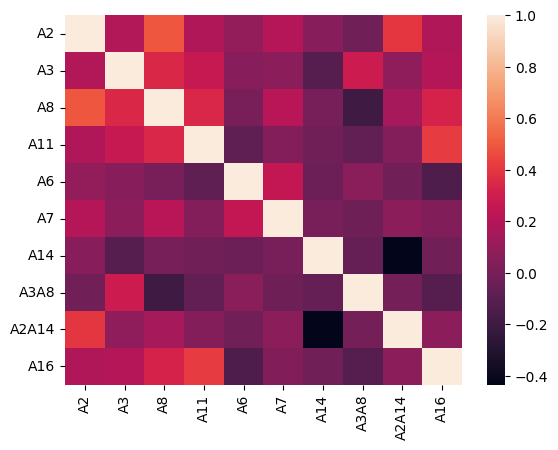

In [700]:
print('Correlation matrix (numeric features and metrics)')
df1 = pd.concat([x_df, y_df], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix);

PairPlots


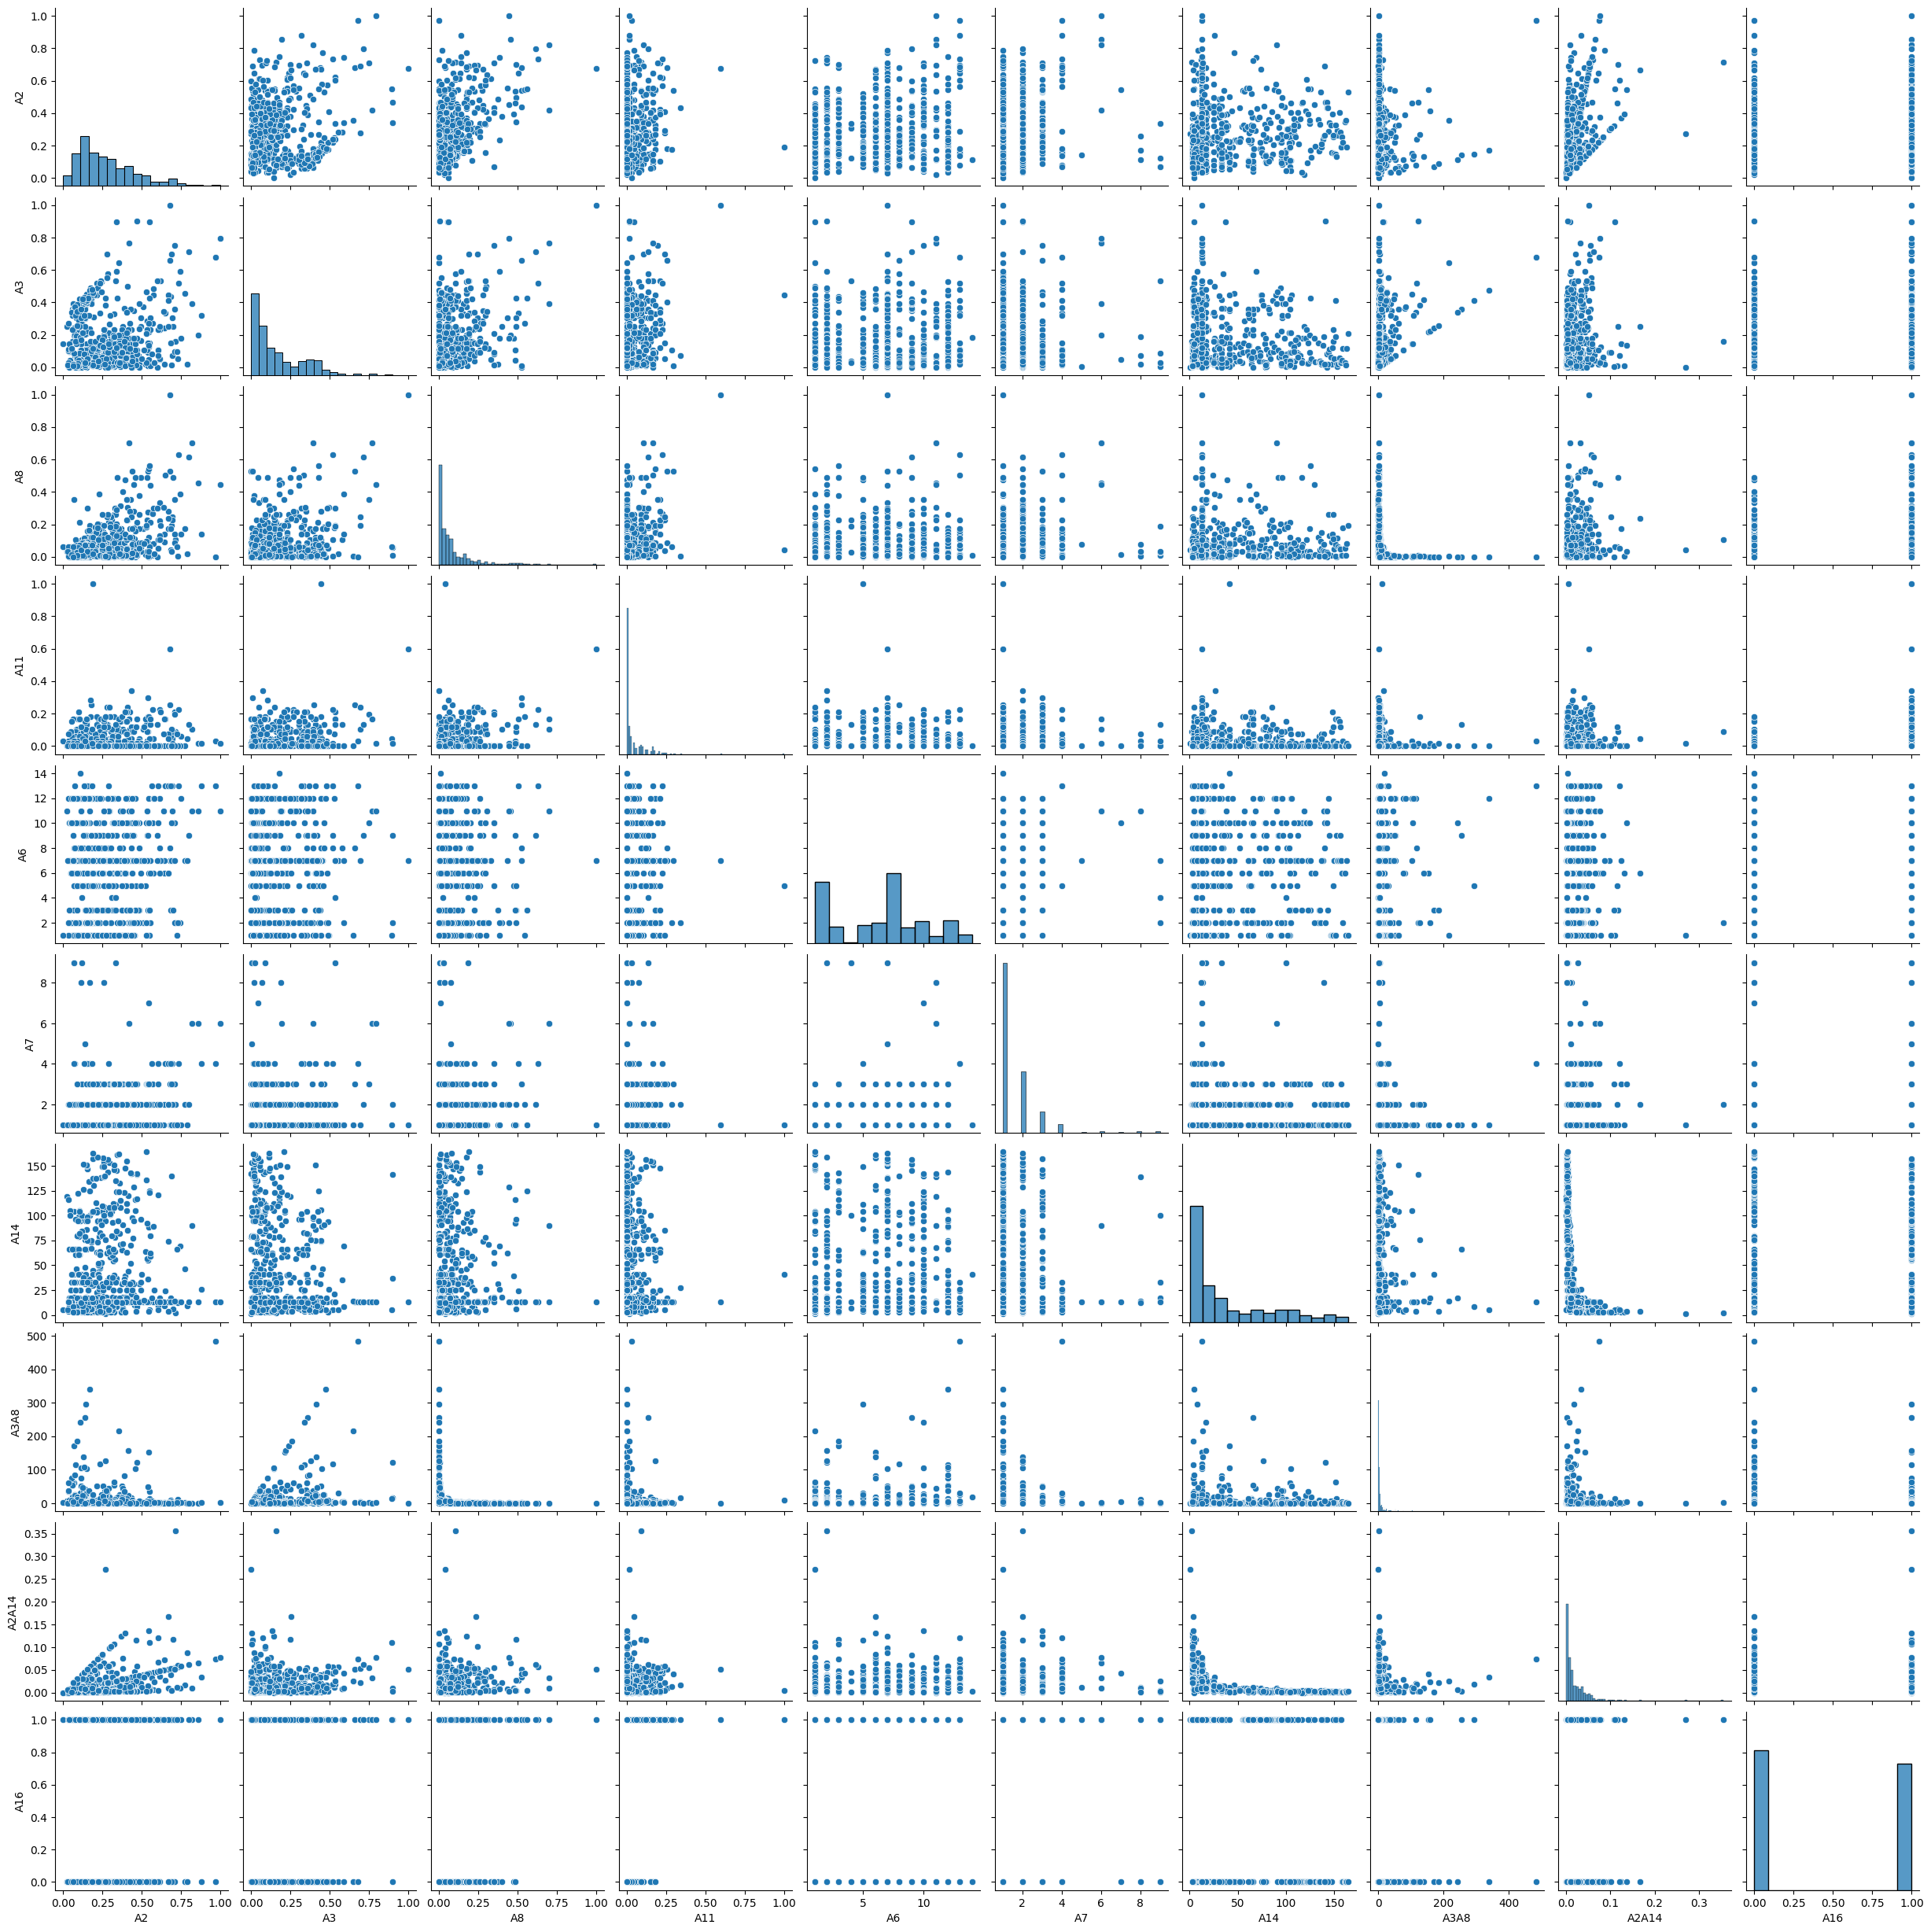

In [701]:
print('PairPlots')
%config InlineBackend.figure_format = 'png'
df1 = pd.concat([x_df, y_df], axis=1)
sns.pairplot(df1);

In [702]:
%config InlineBackend.figure_format = 'svg'

In [703]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [704]:
x_df

,A2,A3,A8,A11,A6,A7,A14,A3A8,A2A14
0,0.271111,0.000000,0.043860,0.014925,1,1,1,0.000000,0.271111
1,0.713016,0.159286,0.106667,0.089552,2,2,2,1.493304,0.356508
2,0.170635,0.017857,0.052632,0.000000,2,2,3,0.339286,0.056878
3,0.223492,0.055000,0.131579,0.074627,1,1,4,0.418000,0.055873
4,0.101905,0.200893,0.060000,0.000000,1,1,5,3.348214,0.020381
...,...,...,...,...,...,...,...,...,...
685,0.116349,0.360179,0.043860,0.000000,11,2,12,8.212071,0.009696
686,0.141587,0.026786,0.070175,0.029851,7,1,17,0.381696,0.008329
687,0.182540,0.482143,0.070175,0.014925,13,4,17,6.870536,0.010738
688,0.066190,0.007321,0.001404,0.000000,12,1,3,5.216518,0.022063


In [705]:
y_df

,A16
0,1
1,1
2,1
3,1
4,1
...,...
685,0
686,0
687,0
688,0


In [706]:
y_df = y_df.values.ravel()

In [707]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=17)
print('Lengths:', len(x_train), len(x_valid), len(x_test))
#print('Lengths:', len(y_train), len(y_valid), len(y_test))

Lengths: 331 143 119


In [708]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [709]:
def check_classification_model(r, x_v, y_v):
    y_p = r.predict(x_v)
    cm = confusion_matrix(y_v, y_p)
    print('Confusion matrix:')
    print(cm)
    return accuracy_score(y_v, y_p), \
precision_score(y_v, y_p, average='macro', zero_division=1), \
recall_score(y_v, y_p, average='macro'), \
f1_score(y_v, y_p, average='macro')

In [710]:
def print_classification_report(r, x_v, y_v):
    y_p = r.predict(x_v)
    cm = confusion_matrix(y_v, y_p)
    print('Confusion matrix:')
    print(cm)
    print(classification_report(y_v, y_p, target_names=[f'class_{i}' for i in range(2)]))

In [711]:
print('Logictic regression')
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
clf = clf.fit(x_train, y_train)
print_classification_report(clf, x_valid, y_valid)
print_classification_report(clf, x_test, y_test)

Logictic regression
Confusion matrix:
[[56 21]
 [24 42]]
              precision    recall  f1-score   support

     class_0       0.70      0.73      0.71        77
     class_1       0.67      0.64      0.65        66

    accuracy                           0.69       143
   macro avg       0.68      0.68      0.68       143
weighted avg       0.68      0.69      0.68       143

Confusion matrix:
[[44 14]
 [29 32]]
              precision    recall  f1-score   support

     class_0       0.60      0.76      0.67        58
     class_1       0.70      0.52      0.60        61

    accuracy                           0.64       119
   macro avg       0.65      0.64      0.63       119
weighted avg       0.65      0.64      0.63       119



In [712]:
print('1. Decision Tree Classifier')
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
print_classification_report(clf, x_valid, y_valid)
print_classification_report(clf, x_test, y_test)

1. Decision Tree Classifier
Confusion matrix:
[[54 23]
 [21 45]]
              precision    recall  f1-score   support

     class_0       0.72      0.70      0.71        77
     class_1       0.66      0.68      0.67        66

    accuracy                           0.69       143
   macro avg       0.69      0.69      0.69       143
weighted avg       0.69      0.69      0.69       143

Confusion matrix:
[[41 17]
 [16 45]]
              precision    recall  f1-score   support

     class_0       0.72      0.71      0.71        58
     class_1       0.73      0.74      0.73        61

    accuracy                           0.72       119
   macro avg       0.72      0.72      0.72       119
weighted avg       0.72      0.72      0.72       119



In [713]:
print('2. Bagging')

2. Bagging


In [714]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf = clf_rf.fit(x_train, y_train)
print_classification_report(clf_rf, x_valid, y_valid)
print_classification_report(clf_rf, x_test, y_test)

Confusion matrix:
[[61 16]
 [22 44]]
              precision    recall  f1-score   support

     class_0       0.73      0.79      0.76        77
     class_1       0.73      0.67      0.70        66

    accuracy                           0.73       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.73      0.73      0.73       143

Confusion matrix:
[[49  9]
 [22 39]]
              precision    recall  f1-score   support

     class_0       0.69      0.84      0.76        58
     class_1       0.81      0.64      0.72        61

    accuracy                           0.74       119
   macro avg       0.75      0.74      0.74       119
weighted avg       0.75      0.74      0.74       119



In [715]:
print('3. Boosting')

3. Boosting


In [716]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb = clf_gb.fit(x_train, y_train)
y_pred_gb = clf_gb.predict(x_valid)
print_classification_report(clf_gb, x_valid, y_valid)
print_classification_report(clf_gb, x_test, y_test)

Confusion matrix:
[[59 18]
 [15 51]]
              precision    recall  f1-score   support

     class_0       0.80      0.77      0.78        77
     class_1       0.74      0.77      0.76        66

    accuracy                           0.77       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.77      0.77      0.77       143

Confusion matrix:
[[49  9]
 [17 44]]
              precision    recall  f1-score   support

     class_0       0.74      0.84      0.79        58
     class_1       0.83      0.72      0.77        61

    accuracy                           0.78       119
   macro avg       0.79      0.78      0.78       119
weighted avg       0.79      0.78      0.78       119



In [717]:
print('4. Staking')

4. Staking


In [718]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
estimators = [
  ('rf', RandomForestClassifier(n_estimators=10, random_state=17)),
  ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=17, max_iter=10000)))
  ]
clf_stck = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
clf_stck = clf_stck.fit(x_train, y_train)
print_classification_report(clf_stck, x_valid, y_valid)
print_classification_report(clf_stck, x_test, y_test)

Confusion matrix:
[[64 13]
 [21 45]]
              precision    recall  f1-score   support

     class_0       0.75      0.83      0.79        77
     class_1       0.78      0.68      0.73        66

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143

Confusion matrix:
[[50  8]
 [20 41]]
              precision    recall  f1-score   support

     class_0       0.71      0.86      0.78        58
     class_1       0.84      0.67      0.75        61

    accuracy                           0.76       119
   macro avg       0.78      0.77      0.76       119
weighted avg       0.78      0.76      0.76       119

